In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv('Heart.csv')

print("Shape of Data:", data.shape)
data

Shape of Data: (303, 15)


,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [4]:
missing_values = data.isna().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64


In [5]:
data_types = data.dtypes
print("Data Types:")
print(data_types)

Data Types:
Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal           object
AHD            object
dtype: object


In [17]:
zeros_count = (data == 0)
print("Zero Counts:")
print(zeros_count)

Zero Counts:
     Unnamed: 0    Age    Sex  ChestPain  RestBP   Chol    Fbs  RestECG  \
0         False  False  False      False   False  False  False    False   
1         False  False  False      False   False  False   True    False   
2         False  False  False      False   False  False   True    False   
3         False  False  False      False   False  False   True     True   
4         False  False   True      False   False  False   True    False   
..          ...    ...    ...        ...     ...    ...    ...      ...   
298       False  False  False      False   False  False   True     True   
299       False  False  False      False   False  False  False     True   
300       False  False  False      False   False  False   True     True   
301       False  False   True      False   False  False   True    False   
302       False  False  False      False   False  False   True     True   

     MaxHR  ExAng  Oldpeak  Slope     Ca   Thal    AHD  
0    False   True    False  F

In [57]:

mean_age = data['Age'].mean()
print("Mean Age of Patients:", mean_age)


Mean Age of Patients: 54.43894389438944


In [19]:
data["AHD"].replace("Yes",1,inplace=True)

In [20]:
data["AHD"].replace("Yes",1)
data["AHD"].replace("No",0,inplace=True)
x=data.drop(columns=["Unnamed: 0","AHD"])
y=data["AHD"]
correlation_AHD_RestBP = data["AHD"].corr(data["RestBP"])
print(correlation_AHD_RestBP)
correlation_AHD_RestBP

0.1508254495945064


0.1508254495945064

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=1,train_size=0.75)

In [23]:
X_train,X_test,Y_train,Y_test

(     Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  \
 170   70    1    nonanginal     160   269    0        0    112      1   
 192   43    1  asymptomatic     132   247    1        2    143      1   
 168   35    1  asymptomatic     126   282    0        2    156      1   
 42    71    0    nontypical     160   302    0        0    162      0   
 90    66    1  asymptomatic     120   302    0        2    151      0   
 ..   ...  ...           ...     ...   ...  ...      ...    ...    ...   
 203   64    0    nonanginal     140   313    0        0    133      0   
 255   42    0    nonanginal     120   209    0        0    173      0   
 72    62    1  asymptomatic     120   267    0        0     99      1   
 235   54    1  asymptomatic     122   286    0        2    116      1   
 37    57    1  asymptomatic     150   276    0        2    112      1   
 
      Oldpeak  Slope   Ca        Thal  
 170      2.9      2  1.0  reversable  
 192      0.1      2  NaN  rev

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [14]:
X_train

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
170,70,1,nonanginal,160,269,0,0,112,1,2.9,2,1.0,reversable
192,43,1,asymptomatic,132,247,1,2,143,1,0.1,2,NaN,reversable
168,35,1,asymptomatic,126,282,0,2,156,1,0.0,1,0.0,reversable
42,71,0,nontypical,160,302,0,0,162,0,0.4,1,2.0,normal
90,66,1,asymptomatic,120,302,0,2,151,0,0.4,2,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,64,0,nonanginal,140,313,0,0,133,0,0.2,1,0.0,reversable
255,42,0,nonanginal,120,209,0,0,173,0,0.0,2,0.0,normal
72,62,1,asymptomatic,120,267,0,0,99,1,1.8,2,2.0,reversable
235,54,1,asymptomatic,122,286,0,2,116,1,3.2,2,2.0,normal


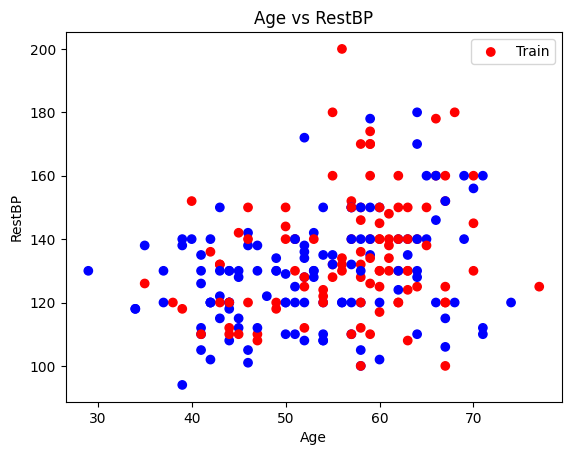

In [25]:
x_column='Age'
y_column='RestBP'
plt.scatter(X_train[x_column],X_train[y_column],c=Y_train.map({1:'r',0:'b'}),label='Train')
#plt.scatter(X_test[x_column],X_test[y_column],c=Y_test.map({1:'orange',0:'purple'}),label='Test',marker='x')

plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f'{x_column} vs {y_column}')
plt.legend()
plt.show()


In [ ]:
X=selected_data.drop()

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(selected_data, test_size=0.25, random_state=42)


In [17]:
# Identify non-numeric columns
non_numeric_columns = train_data.select_dtypes(exclude=[np.number]).columns

# Exclude non-numeric columns from the correlation calculation
numeric_train_data = train_data.drop(columns=non_numeric_columns)

# Calculate correlation matrix
correlation_matrix = numeric_train_data.corr()


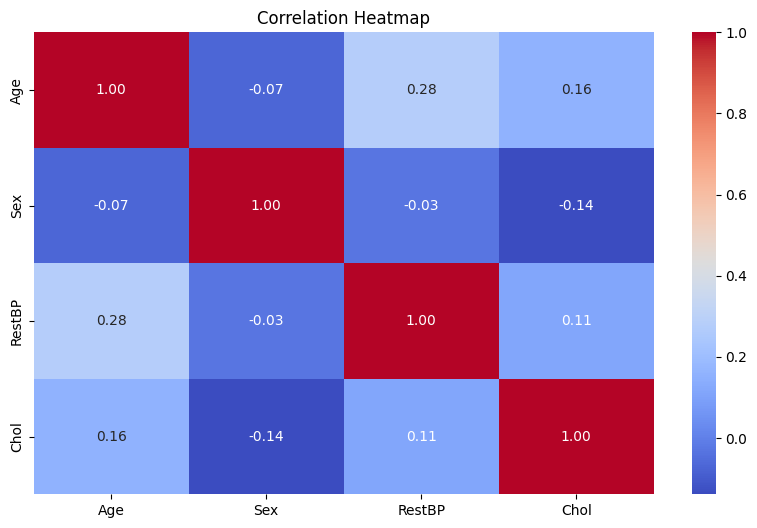

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [19]:
age_chol_correlation = train_data['Age'].corr(train_data['Chol'])
print("Correlation between Age and Chol:", age_chol_correlation)

Correlation between Age and Chol: 0.15847741480458988
